# Micro Credit Defaulter Project

### Problem Statement: 
- A Microfinance Institution (MFI) is an organization that offers financial services to low income populations. MFS becomes very useful when targeting especially the unbanked poor families living in remote areas with not much sources of income. The Microfinance services (MFS) provided by MFI are Group Loans, Agricultural Loans, Individual Business Loans and so on. 
- Many microfinance institutions (MFI), experts and donors are supporting the idea of using mobile financial services (MFS) which they feel are more convenient and efficient, and cost saving, than the traditional high-touch model used since long for the purpose of delivering microfinance services. Though, the MFI industry is primarily focusing on low income families and are very useful in such areas, the implementation of MFS has been uneven with both significant challenges and successes.
- Today, microfinance is widely accepted as a poverty-reduction tool, representing 70 billion in outstanding loans and a global outreach of 200 million clients.
- We are working with one such client that is in Telecom Industry. They are a fixed wireless telecommunications network provider. They have launched various products and have developed its business and organization based on the budget operator model, offering better products at Lower Prices to all value conscious customers through a strategy of disruptive innovation that focuses on the subscriber. 
- They understand the importance of communication and how it affects a person’s life, thus, focusing on providing their services and products to low income families and poor customers that can help them in the need of hour. 
- They are collaborating with an MFI to provide micro-credit on mobile balances to be paid back in 5 days. The Consumer is believed to be defaulter if he deviates from the path of paying back the loaned amount within the time duration of 5 days. For the loan amount of 5 (in Indonesian Rupiah), payback amount should be 6 (in Indonesian Rupiah), while, for the loan amount of 10 (in Indonesian Rupiah), the payback amount should be 12 (in Indonesian Rupiah). 
- The sample data is provided to us from our client database. It is hereby given to you for this exercise. In order to improve the selection of customers for the credit, the client wants some predictions that could help them in further investment and improvement in selection of customers. 
### Exercise:

Build a model which can be used to predict in terms of a probability for each loan transaction, whether the customer will be paying back the loaned amount within 5 days of insurance of loan. In this case, Label ‘1’ indicates that the loan has been payed i.e. Non- defaulter, while, Label ‘0’ indicates that the loan has not been payed i.e. defaulter.  
#### Points to Remember:
- There are no null values in the dataset. 
- There may be some customers with no loan history. 
- The dataset is imbalanced. Label ‘1’ has approximately 87.5% records, while, label ‘0’ has approximately 12.5% records.
- For some features, there may be values which might not be realistic. You may have to observe them and treat them with a suitable explanation.
- You might come across outliers in some features which you need to handle as per your understanding. Keep in mind that data is expensive and we cannot lose more than 7-8% of the data.  
- Find Enclosed the Data Description File and The Sample Data for the Modeling Exercise.





### Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
pd.set_option("display.max_columns",None)

### Importing Dataset

In [3]:
# Importing the data from excel file
df = pd.read_csv("E:\Flip Robo\Project\Micro Credit Project\Data file.csv")
df.head()

,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,1,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,2,21.0,3078.0,1539.0,7.50,2,21,3078,1539.0,7.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,2016-07-20
1,2,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,1,0.0,5787.0,5787.0,61.04,1,0,5787,5787.0,61.04,0.0,0.0,0,0,1,12,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,2016-08-10
2,3,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,1,0.0,1539.0,1539.0,66.32,1,0,1539,1539.0,66.32,0.0,0.0,0,0,1,6,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016-08-19
3,4,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,0,0.0,0.0,0.0,0.00,1,0,947,947.0,2.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,2016-06-06
4,5,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,7,2.0,20029.0,2309.0,29.00,8,2,23496,2888.0,35.00,0.0,0.0,0,0,7,42,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,2016-06-22


# Exploratory Data Analysis (EDA)

In [4]:
# Checking shape of the dataset
df.shape

(209593, 37)

### Checking the type of dataset

In [5]:
df.dtypes.to_frame("Data Type")

,Data Type
Unnamed: 0,int64
label,int64
msisdn,object
aon,float64
daily_decr30,float64
daily_decr90,float64
rental30,float64
rental90,float64
last_rech_date_ma,float64
last_rech_date_da,float64


- We can see, there are three type of data named categorical, float and integer datatype.
- Unnamed: 0  is not important features so i dropped this features.

In [6]:
# Column Name of Integer Type of data  
int_features = df.select_dtypes(include=['int64']).columns
print("Total Numbers of Integer Features: ", int_features.shape[0])

print("Integer Feature Name: ", int_features.tolist())

Total Numbers of Integer Features:  13
Integer Feature Name:  ['Unnamed: 0', 'label', 'last_rech_amt_ma', 'cnt_ma_rech30', 'cnt_ma_rech90', 'fr_ma_rech90', 'sumamnt_ma_rech90', 'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans30', 'amnt_loans30', 'amnt_loans90', 'maxamnt_loans90']


In [7]:
# Column Name of float Type of data  
float_features = df.select_dtypes(include=['float64']).columns
print("Total Numbers of float Features: ", float_features.shape[0])

print("float Feature Name: ", float_features.tolist())

Total Numbers of float Features:  21
float Feature Name:  ['aon', 'daily_decr30', 'daily_decr90', 'rental30', 'rental90', 'last_rech_date_ma', 'last_rech_date_da', 'fr_ma_rech30', 'sumamnt_ma_rech30', 'medianamnt_ma_rech30', 'medianmarechprebal30', 'medianamnt_ma_rech90', 'medianmarechprebal90', 'cnt_da_rech30', 'fr_da_rech30', 'maxamnt_loans30', 'medianamnt_loans30', 'cnt_loans90', 'medianamnt_loans90', 'payback30', 'payback90']


In [8]:
# Column Name of Categorical Type of data  
cat_features = df.select_dtypes(include=['object']).columns
print("Total Numbers of Categorical Features: ", cat_features.shape[0])

print("Categorical Feature Name: ", cat_features.tolist())

Total Numbers of Categorical Features:  3
Categorical Feature Name:  ['msisdn', 'pcircle', 'pdate']


### Checking Unique values

In [9]:
df.nunique().to_frame("Unique Value")

,Unique Value
Unnamed: 0,209593
label,2
msisdn,186243
aon,4507
daily_decr30,147025
daily_decr90,158669
rental30,132148
rental90,141033
last_rech_date_ma,1186
last_rech_date_da,1174


- Columns are containing multiple unique values.

### Checking Null values

In [10]:
# Null Value count of data 
null_count = df.isnull().sum().to_frame("Null Value")
null_count

,Null Value
Unnamed: 0,0
label,0
msisdn,0
aon,0
daily_decr30,0
daily_decr90,0
rental30,0
rental90,0
last_rech_date_ma,0
last_rech_date_da,0


- No null values are present in dataset.

### Checking the value counts of each columns

In [11]:
df['label'].value_counts()

1    183431
0     26162
Name: label, dtype: int64

#### This code has take lots of space so i am running this code and find some fetures or records are useless, due to this i am not showing all records so i keep this code as comment
for i in df.columns:  
        print(df[i].value_counts())  
        print('\n','#'*100, '\n')  

In [12]:
# Dopping the features who's having more than 90% of zero value
df.drop(columns=['medianamnt_loans90','payback30','medianmarechprebal90','amnt_loans90',],axis=1, inplace =True)

### Filling values who's having 0 number

In [13]:
df['medianmarechprebal30'] = df['medianmarechprebal30'].replace(0,df['medianmarechprebal30'].mean())
df['sumamnt_ma_rech90'] = df['sumamnt_ma_rech90'].replace(0,df['sumamnt_ma_rech90'].mean())
df['cnt_da_rech30'] = df['cnt_da_rech30'].replace(0,df['cnt_da_rech30'].mean())
df['fr_da_rech30'] = df['fr_da_rech30'].replace(0,df['fr_da_rech30'].mean())

df['medianamnt_loans30'] = df['medianamnt_loans30'].replace(0,df['medianamnt_loans30'].mean())
df['cnt_da_rech90'] = df['cnt_da_rech90'].replace(0,df['cnt_da_rech90'].mean())
df['fr_da_rech90'] = df['fr_da_rech90'].replace(0,df['fr_da_rech90'].mean())
df['cnt_loans30'] = df['cnt_loans30'].replace(0,df['cnt_loans30'].mean())
df['amnt_loans30'] = df['amnt_loans30'].replace(0,df['amnt_loans30'].mean())

df['cnt_loans90'] = df['cnt_loans90'].replace(0,df['cnt_loans90'].mean())


#### Dropping Unnamed: 0, msisdn and pcircle columns because it's useless.

In [14]:
df.drop(columns=['Unnamed: 0','msisdn','pcircle'], axis=1,inplace=True)

In [15]:
df.head()

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,maxamnt_loans90,payback90,pdate
0,0,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,2,21.0,3078.0,1539.0,7.500000,2,21,3078.0,1539.0,262.57811,3749.494447,0.041495,0.045712,2.0,12.0,6.0,0.054029,2.0,6,29.000000,2016-07-20
1,1,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,1,0.0,5787.0,5787.0,61.040000,1,0,5787.0,5787.0,262.57811,3749.494447,0.041495,0.045712,1.0,12.0,12.0,0.054029,1.0,12,0.000000,2016-08-10
2,1,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,1,0.0,1539.0,1539.0,66.320000,1,0,1539.0,1539.0,262.57811,3749.494447,0.041495,0.045712,1.0,6.0,6.0,0.054029,1.0,6,0.000000,2016-08-19
3,1,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,0,0.0,0.0,0.0,3851.927942,1,0,947.0,947.0,262.57811,3749.494447,0.041495,0.045712,2.0,12.0,6.0,0.054029,2.0,6,0.000000,2016-06-06
4,1,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,7,2.0,20029.0,2309.0,29.000000,8,2,23496.0,2888.0,262.57811,3749.494447,0.041495,0.045712,7.0,42.0,6.0,0.054029,7.0,6,2.333333,2016-06-22


In [16]:
df['pdate'] = pd.to_datetime(df['pdate'])
df['year'] = df['pdate'].dt.year
df['month'] = df['pdate'].dt.month
df['day'] = df['pdate'].dt.day

In [17]:
# Drop Date column:
df.drop('pdate', axis = 1, inplace = True)
df.head()

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,maxamnt_loans90,payback90,year,month,day
0,0,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,2,21.0,3078.0,1539.0,7.500000,2,21,3078.0,1539.0,262.57811,3749.494447,0.041495,0.045712,2.0,12.0,6.0,0.054029,2.0,6,29.000000,2016,7,20
1,1,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,1,0.0,5787.0,5787.0,61.040000,1,0,5787.0,5787.0,262.57811,3749.494447,0.041495,0.045712,1.0,12.0,12.0,0.054029,1.0,12,0.000000,2016,8,10
2,1,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,1,0.0,1539.0,1539.0,66.320000,1,0,1539.0,1539.0,262.57811,3749.494447,0.041495,0.045712,1.0,6.0,6.0,0.054029,1.0,6,0.000000,2016,8,19
3,1,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,0,0.0,0.0,0.0,3851.927942,1,0,947.0,947.0,262.57811,3749.494447,0.041495,0.045712,2.0,12.0,6.0,0.054029,2.0,6,0.000000,2016,6,6
4,1,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,7,2.0,20029.0,2309.0,29.000000,8,2,23496.0,2888.0,262.57811,3749.494447,0.041495,0.045712,7.0,42.0,6.0,0.054029,7.0,6,2.333333,2016,6,22


### Checking info of dataset

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209593 entries, 0 to 209592
Data columns (total 32 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   label                 209593 non-null  int64  
 1   aon                   209593 non-null  float64
 2   daily_decr30          209593 non-null  float64
 3   daily_decr90          209593 non-null  float64
 4   rental30              209593 non-null  float64
 5   rental90              209593 non-null  float64
 6   last_rech_date_ma     209593 non-null  float64
 7   last_rech_date_da     209593 non-null  float64
 8   last_rech_amt_ma      209593 non-null  int64  
 9   cnt_ma_rech30         209593 non-null  int64  
 10  fr_ma_rech30          209593 non-null  float64
 11  sumamnt_ma_rech30     209593 non-null  float64
 12  medianamnt_ma_rech30  209593 non-null  float64
 13  medianmarechprebal30  209593 non-null  float64
 14  cnt_ma_rech90         209593 non-null  int64  
 15  

- All features are ok with respect to their datatype.

### Dataset Description

In [19]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
label,209593.0,0.875177,0.330519,0.000000,1.000000,1.000000,1.000000,1.000000
aon,209593.0,8112.343445,75696.082531,-48.000000,246.000000,527.000000,982.000000,999860.755168
daily_decr30,209593.0,5381.402289,9220.623400,-93.012667,42.440000,1469.175667,7244.000000,265926.000000
daily_decr90,209593.0,6082.515068,10918.812767,-93.012667,42.692000,1500.000000,7802.790000,320630.000000
rental30,209593.0,2692.581910,4308.586781,-23737.140000,280.420000,1083.570000,3356.940000,198926.110000
rental90,209593.0,3483.406534,5770.461279,-24720.580000,300.260000,1334.000000,4201.790000,200148.110000
last_rech_date_ma,209593.0,3755.847800,53905.892230,-29.000000,1.000000,3.000000,7.000000,998650.377733
last_rech_date_da,209593.0,3712.202921,53374.833430,-29.000000,0.000000,0.000000,0.000000,999171.809410
last_rech_amt_ma,209593.0,2064.452797,2370.786034,0.000000,770.000000,1539.000000,2309.000000,55000.000000
cnt_ma_rech30,209593.0,3.978057,4.256090,0.000000,1.000000,3.000000,5.000000,203.000000


#### Outcome of describe of datasets:

 - Most of the features are having high difference of 75% to max, columns is considerable indicating presence of outliers.
 - In some features Mean to Standrad of deviation difference is close.

## Univariate Analysis

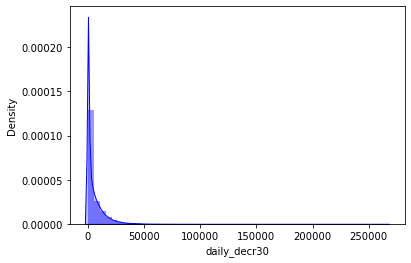

In [20]:
# Distribution plot for the column daily_decr30
sns.distplot(df["daily_decr30"],color="b",kde_kws={"shade": True},)
plt.show()

- daily_decr30 is not normally distributed. It contain some outliers. and it is positively or right skewd.

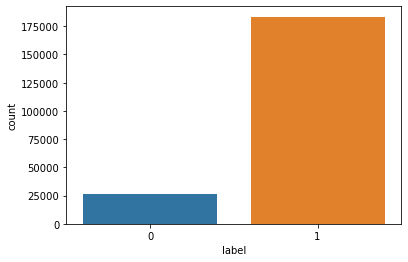

In [21]:
sns.countplot(x='label',data=df)
plt.show()

- Label is imballanced so we need to balanced it.

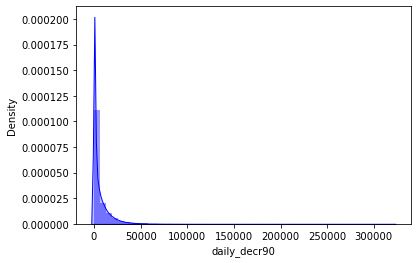

In [22]:
# Distribution plot for the column daily_decr30
sns.distplot(df["daily_decr90"],color="b",kde_kws={"shade": True},)
plt.show()

- Daily amount spent from main account, averaged over last 90 days (in Indonesian Rupiah) is not normaly distributed.
- Maximum daily amount spent in in the range of 0 to 50000.

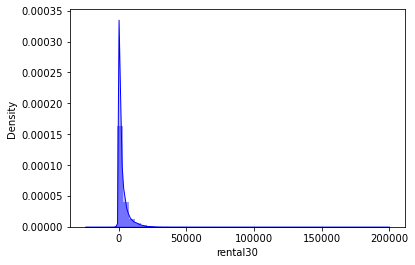

In [23]:
# Distribution plot for the column rental30
sns.distplot(df["rental30"],color="b",kde_kws={"shade": True},)
plt.show()

- Average main account balance over last 30 days i.e. rental 30 is in the range of 0 to 50000. maximum rental30 is lies below the 25000. 
- Rental is not a nornaly distributed.

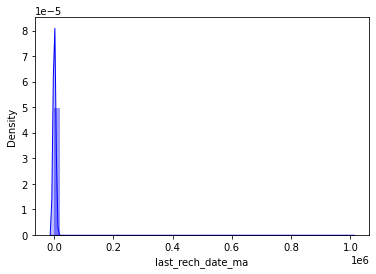

In [24]:
# Distribution plot for the column last_rech_date_ma
sns.distplot(df["last_rech_date_ma"],color="b",kde_kws={"shade": True},)
plt.show()

- Maximum Number of days till last recharge of main account lie in the range of 0 to 0.2. But mostly the data are contains 0.0.

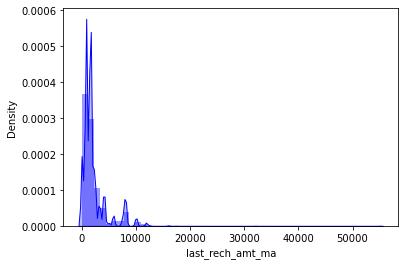

In [25]:
# Distribution plot for the column last_rech_date_ma
sns.distplot(df["last_rech_amt_ma"],color="b",kde_kws={"shade": True},)
plt.show()

- Amount of last recharge of main account is in the range of 0 to 10000. But Maximum data is lies in below 6000.
- Data is not normaly distributed. It is right or positively skewed.

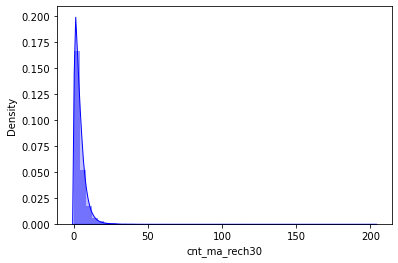

In [26]:
# Distribution plot for the column cnt_ma_rech30
sns.distplot(df["cnt_ma_rech30"],color="b",kde_kws={"shade": True},)
plt.show()

- We can see less 30 Number of times main account got recharged in last 30 days.
- And data is positively skewed.

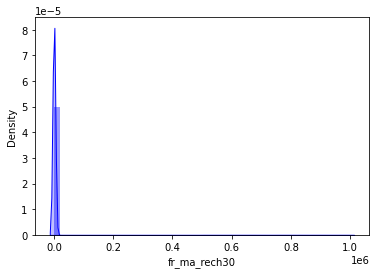

In [27]:
# Distribution plot for the column cnt_ma_rech30
sns.distplot(df["fr_ma_rech30"],color="b",kde_kws={"shade": True},)
plt.show()

- We can see, almot o time Frequency of main account recharged in last 30 days.

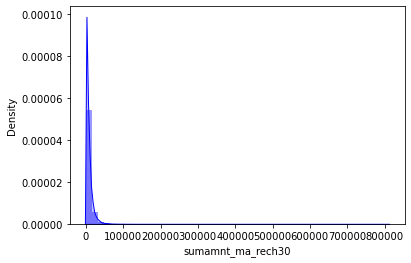

In [28]:
# Distribution plot for the column sumamnt_ma_rech30
sns.distplot(df["sumamnt_ma_rech30"],color="b",kde_kws={"shade": True},)
plt.show()

- Less than 50000 time the Total amount of recharge in main account over last 30 days is happend.

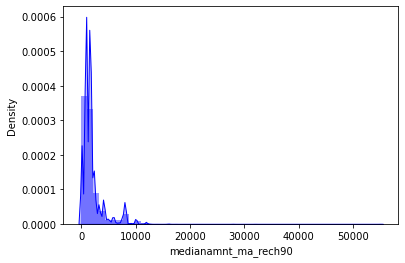

In [29]:
# Distribution plot for the column medianamnt_ma_rech90
sns.distplot(df["medianamnt_ma_rech90"],color="b",kde_kws={"shade": True},)
plt.show()

- Less than 10000 time Median of amount of recharges done in main account over last 30 days at user level.

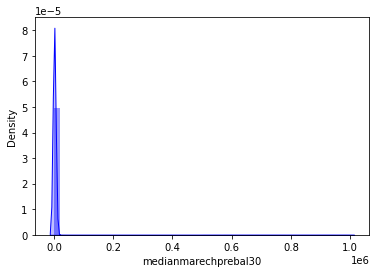

In [30]:
# Distribution plot for the column medianmarechprebal30
sns.distplot(df["medianmarechprebal30"],color="b",kde_kws={"shade": True},)
plt.show()

- 0 is a Median of main account balance just before recharge in last 30 days at user level.
- We can see, 0 is median where the users are doing recharge in last 30 days.

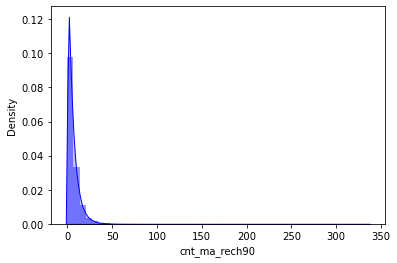

In [31]:
# Distribution plot for the column cnt_ma_rech90 
sns.distplot(df["cnt_ma_rech90"],color="b",kde_kws={"shade": True},)
plt.show()

- We can see less 30 Number of times main account got recharged in last 90 days.
- It has very high count than others. It show positively skewed.

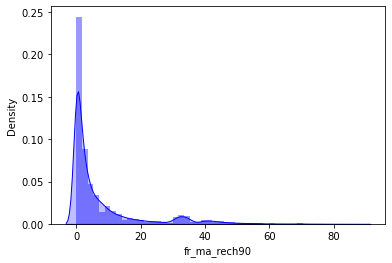

In [32]:
# Distribution plot for the column fr_ma_rech90
sns.distplot(df["fr_ma_rech90"],color="b",kde_kws={"shade": True},)
plt.show()

- We can see the users are doing less than 20 time the Frequency of main account recharged in last 90 days.
- it show that users are not interested.

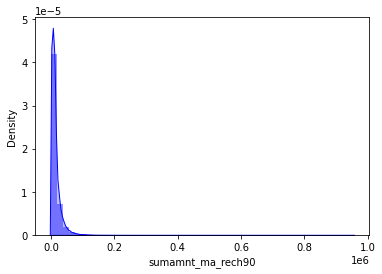

In [33]:
# Distribution plot for the column sumamnt_ma_rech90
sns.distplot(df["sumamnt_ma_rech90"],color="b",kde_kws={"shade": True})
plt.show()

- We can see. less than 1.5 Total amount of recharge in main account over last 90 days.

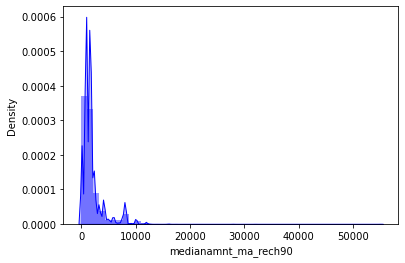

In [34]:
# Distribution plot for the column medianamnt_ma_rech90
sns.distplot(df["medianamnt_ma_rech90"],color="b",kde_kws={"shade": True})
plt.show()

- Less than 10000 Median of amount of recharges done in main account over last 90 days at user level.

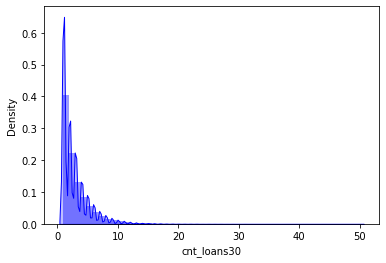

In [35]:
# Distribution plot for the column cnt_loans30
sns.distplot(df["cnt_loans30"],color="b",kde_kws={"shade": True})
plt.show()

- User are taking less than 10 Number of loans taken by user in last 30 days and
- I show that user are taking less than 10 loans but mostly the users are taking upto 5 loans in last 30 days.

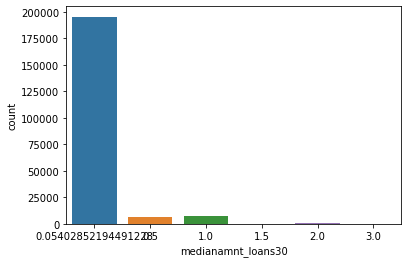

In [36]:
sns.countplot(x='medianamnt_loans30',data=df)
plt.show()

- We can see 0 is a Median of amounts of loan taken by the user in last 30 days.

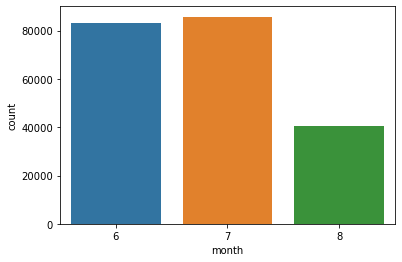

In [37]:
sns.countplot(x='month',data=df)
plt.show()

- We can see in 7 month maximum users are taking loan than others followed by 6 months.

## Bivariate Analysis

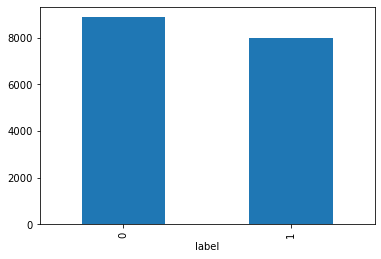

In [38]:
df.groupby('label')['aon'].mean().plot.bar()
plt.show()

- Customers with high value of Age on cellular network in days(aon) are maximum defaulters(who have not paid there loan amount-0).


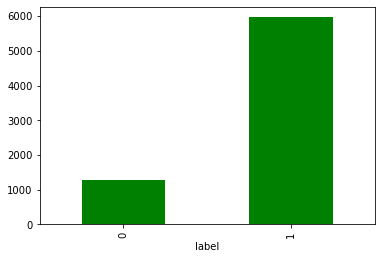

In [39]:
df.groupby('label')['daily_decr30'].mean().plot.bar(color='g')
plt.show()

- Customers with high value of Daily amount spent from main account, averaged over last 30 days (in Indonesian Rupiah)(daily_decr30) are maximum Non-defaulters(who have paid there loan amount-1).

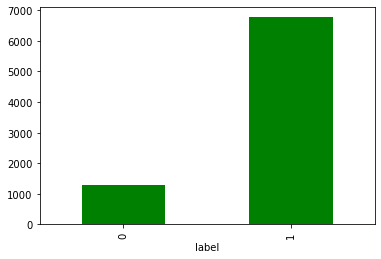

In [40]:
df.groupby('label')['daily_decr90'].mean().plot.bar(color='green')
plt.show()

- Customers with high value of Daily amount spent from main account, averaged over last 90 days (in Indonesian Rupiah)(daily_decr90) are maximum Non-defaulters(who have paid there loan amount-1).


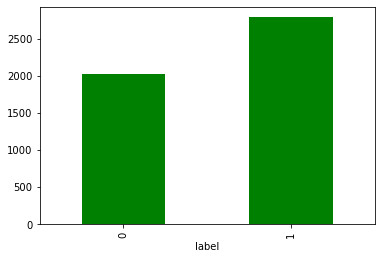

In [41]:
df.groupby('label')['rental30'].mean().plot.bar(color='green')
plt.show()

- Customers with high value of Average main account balance over last 30 days(rental30) are maximum Non-defaulters(who have paid there loan amount-1).


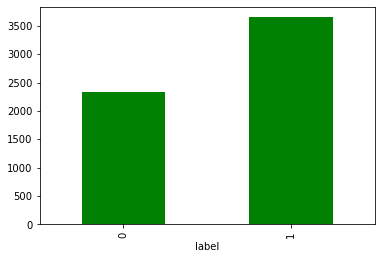

In [42]:
df.groupby('label')['rental90'].mean().plot.bar(color='green')
plt.show()

- Customers with high value of Average main account balance over last 90 days(rental90) are maximum Non-defaulters(who have paid there loan amount-1).

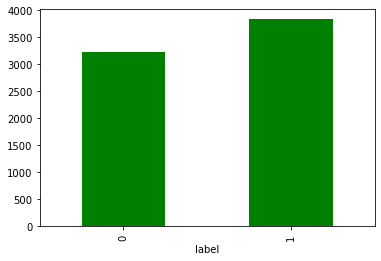

In [43]:
df.groupby('label')['last_rech_date_ma'].mean().plot.bar(color='green')
plt.show()

- Customers with high Number of days till last recharge of main account(last_rech_date_ma) are maximum Non-defaulters(who have paid there loan amount-1).

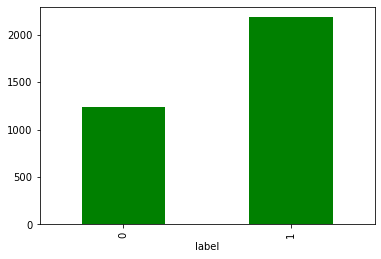

In [44]:
df.groupby('label')['last_rech_amt_ma'].mean().plot.bar(color='green')
plt.show()

- Customers with high value of Amount of last recharge of main account (in Indonesian Rupiah)(last_rech_amt_ma) are maximum Nondefaulters(who have paid there loan amount-1).

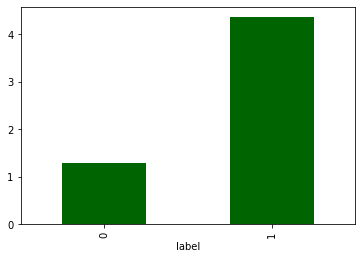

In [45]:
df.groupby('label')['cnt_ma_rech30'].mean().plot.bar(color='darkgreen')
plt.show()

- Customers with high value of Number of times main account got recharged in last 30 days(cnt_ma_rech30) are maximum value count 1. It means the there is less loan defaulter.

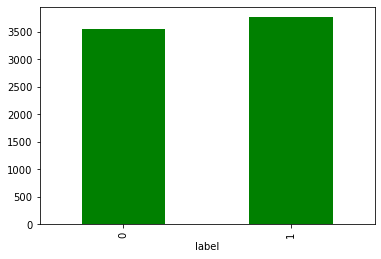

In [46]:
df.groupby('label')['fr_ma_rech30'].mean().plot.bar(color='green')
plt.show()

- Frequency of main account recharged in last 30 days are near to each others. In this who's are not defaulting loan are higher than defaulting loan.
- But whos's are defaulting lon are also high in count but less than not defaulting.

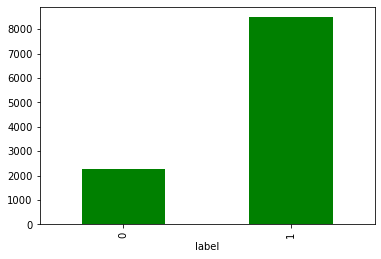

In [47]:
df.groupby('label')['sumamnt_ma_rech30'].mean().plot.bar(color='green')
plt.show()

- We can see, maximum customer doing their recharge at  time but Total amount of recharge in main account over last 30 days (in Indonesian Rupiah) of defualting loan is less than not defaulting loan.

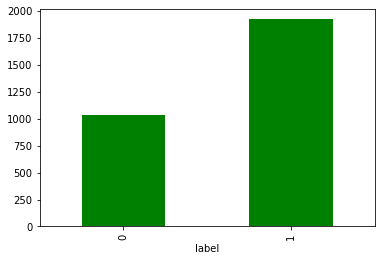

In [48]:
df.groupby('label')['medianamnt_ma_rech30'].mean().plot.bar(color='green')
plt.show()

- Customers with high value of Median of amount of recharges done in main account over last 30 days at user level (in Indonesian Rupiah)(medianamnt_ma_rech30) are maximum Non-defaulters(who have paid there loan amount-1).


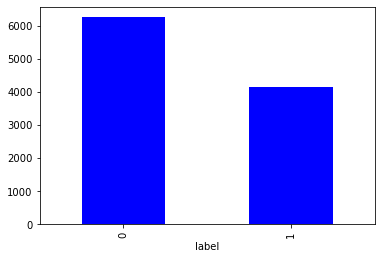

In [49]:
df.groupby('label')['medianmarechprebal30'].mean().plot.bar(color='b')
plt.show()

- Median of main account balance just before recharge in last 30 days at user level (in Indonesian Rupiah) is high in whose are loan defaulting.
- It is less in those are not defaulting the loan.

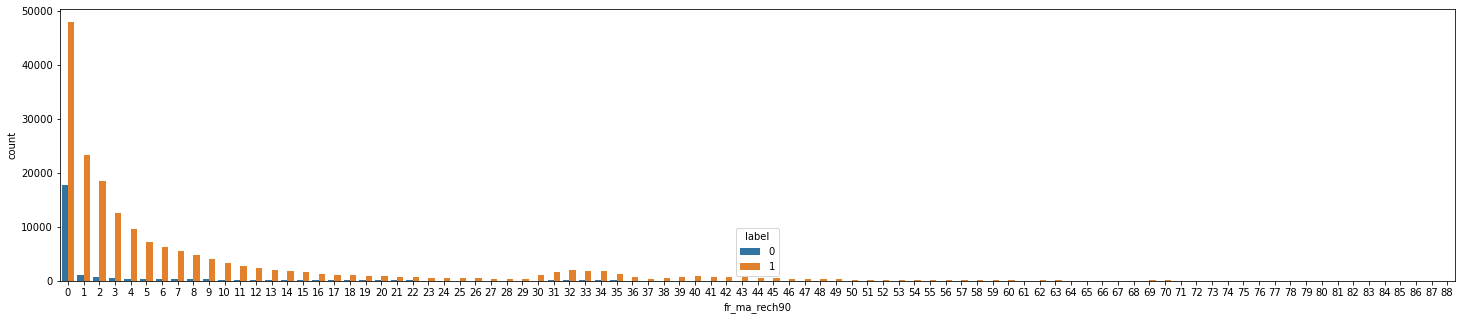

In [50]:
plt.figure(figsize=(25,5))
sns.countplot(x='fr_ma_rech90',hue='label',data=df)
plt.show()

- We can see there are less Frequency of main account recharged in last 90 days whose defaulting the loan.


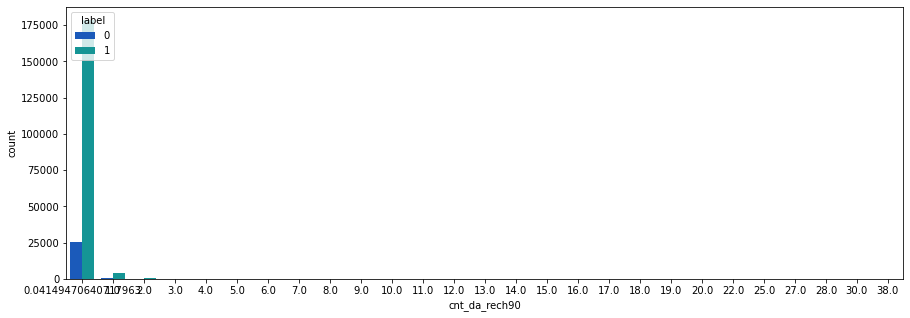

In [51]:
plt.figure(figsize=(15,5))
sns.countplot(x='cnt_da_rech90',hue='label',data=df,palette='winter')
plt.show()

- We can see, there are less defaulter whose having less Number of times data account got recharged in last 30 days.


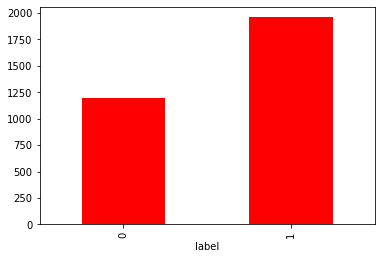

In [52]:
df.groupby('label')['medianamnt_ma_rech90'].mean().plot.bar(color='r')
plt.show()

- Median of amount of recharges done in main account over last 90 days at user level (in Indonasian Rupiah), in this feature there are less defaulting loan.
- But upto 1175 the defaulting loan count.

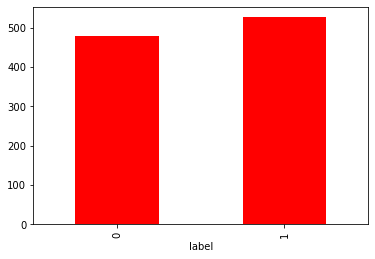

In [53]:
df.groupby('label')['cnt_da_rech30'].mean().plot.bar(color='r')
plt.show()

- Number of times data account got recharged in last 30 days(cnt_dat_rech30) has high loan not defalter than defaulting loan.
- But Who's are not defaulting loan it also in high count but little less than not defaulting count.

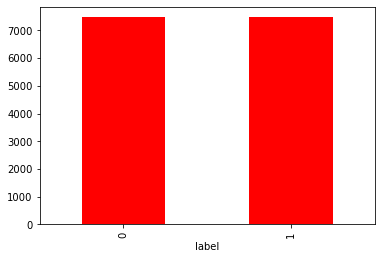

In [54]:
df.groupby('label')['fr_da_rech30'].mean().plot.bar(color='r')
plt.show()

- We can see, Frequency of data account recharged in last 30 days(fr_da_rech30) are almost same for both defaulting laon and not defaulting loan.


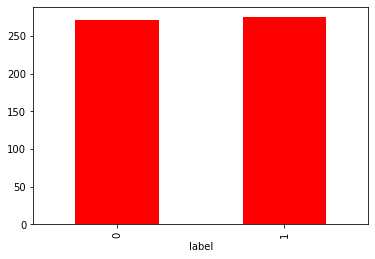

In [55]:
df.groupby('label')['maxamnt_loans30'].mean().plot.bar(color='r')
plt.show()

- We can see maximum amount of loan taken by the user in last 30 days are almost same for both defaulting the loan and not defaulting the loan.
- It mean that user are taking maximum loan and not paid the loan amount or defaulting the loan.


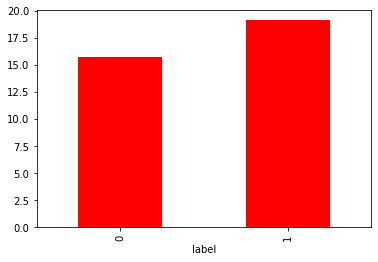

In [56]:
df.groupby('label')['cnt_loans90'].mean().plot.bar(color='r')
plt.show()

- Number of loans taken by user in last 90 days is high and it also high in loan are not defaulting.
- But loan defaulting little lower than non defalting users.

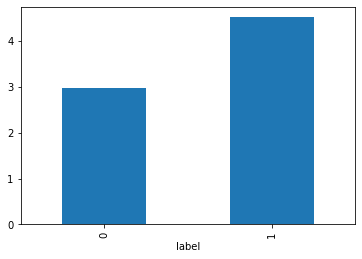

In [57]:
df.groupby('label')['payback90'].mean().plot.bar()
plt.show()

- Customers with high value of Average payback time in days over last 90 days(payback90) are maximum Non-defaulters(who have paid there loan amount-1).

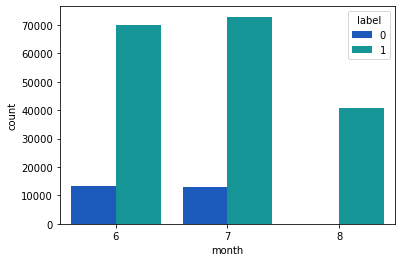

In [58]:
sns.countplot(x='month',hue='label',data=df,palette='winter')
plt.show()

- We can see, in 7 month customers are taking loan is high than 6 month and it loan defaulting also high in 7 month than 6 month.
- But in 8 Month non defaulting loan are not present. it mean in this month customer are not defaulting the loan.

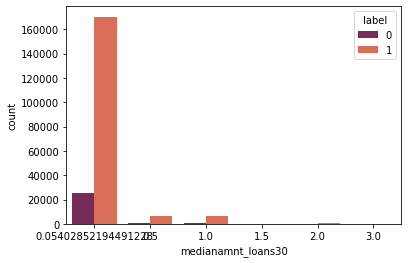

In [59]:
sns.countplot(x='medianamnt_loans30',hue='label',data=df,palette='rocket')
plt.show()

- Median of amounts of loan taken by the user in last 30 days is high in non defaulting loan.
- Here is only 6 categories are given in which 0.05 is having high non defaulting customers.

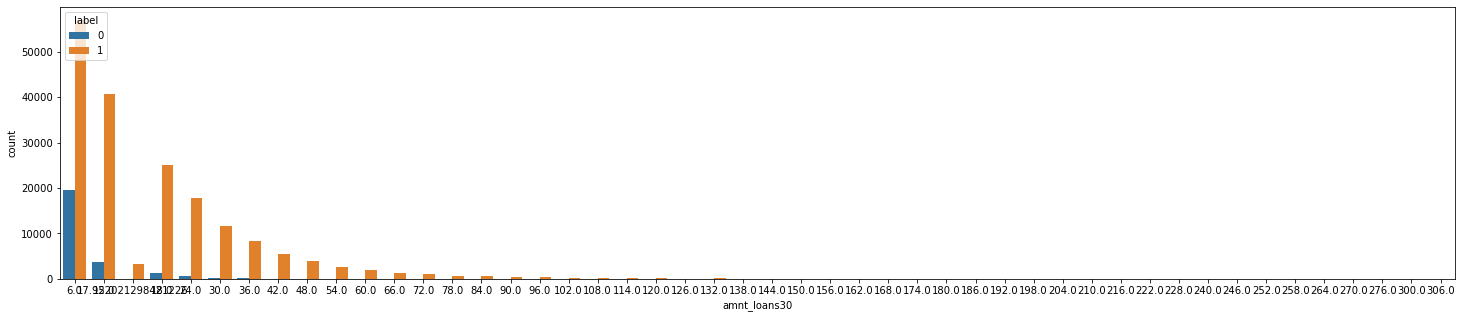

In [60]:
plt.figure(figsize=(25,5))
sns.countplot(x='amnt_loans30',hue='label',data=df)
plt.show()

- Total amount of loans taken by user in last 90 days, in which 0.07 has high count than others. 
- And It has high loan defaulting count than others.

## Correlation of the features with target column

In [61]:
df.corr()['label'].sort_values().to_frame("Short ")

,Short
medianmarechprebal30,-0.012883
fr_da_rech90,-0.005406
aon,-0.003785
fr_da_rech30,-0.000013
maxamnt_loans30,0.000248
fr_ma_rech30,0.001330
last_rech_date_da,0.001711
cnt_da_rech90,0.002720
last_rech_date_ma,0.003728
cnt_da_rech30,0.003760


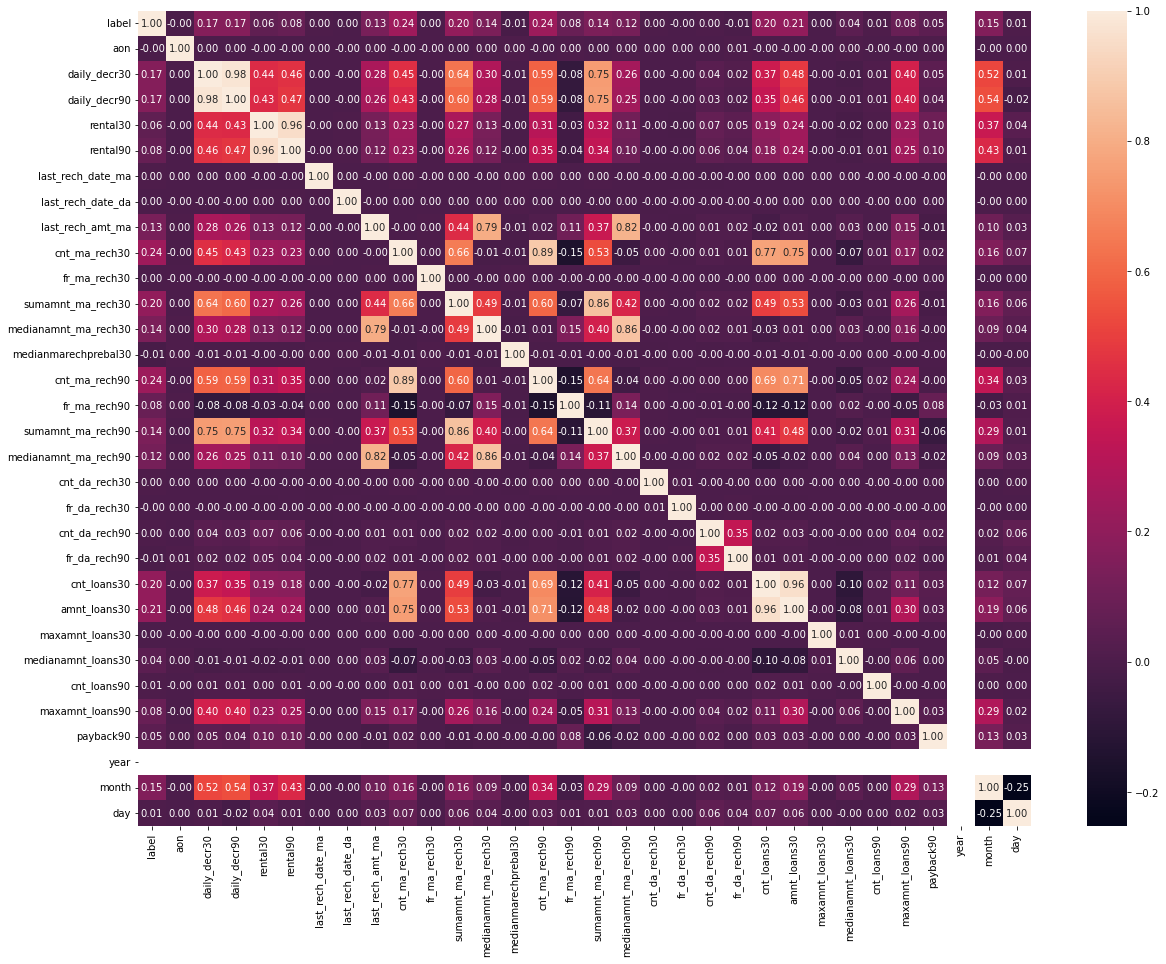

In [62]:
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(), annot=True, fmt ='.2f')
plt.show()

### Outcome of Correlation

 1. daily_decr30 has 17% positive correlation with target column.
 2. cnt_ma_rech30 has 24% positive correlation with target column.
 3. cnt_ma_rech90 has 24% positive correlation with target column.
 4. cnt_loans30 has 20% positive correlation with target column.
 5. amt_loan30 has 21% positive correlation with target columns.
 6. month has 15% positive correlation with target column.
 
 #### Features correlation to each other
 
 
 
 1. daily_decr30 have 98%, 75% positive correlation with daily_decr90 and sumamnat_ma_rech90.
 2. rental90 has 98% positive correlation with rental30.
 3. last_rech_amt_ma has 82% and 79% positive correlation with medianamnt_ma_rech90 and medianamnt_ma_rech30.
 4. cnt_ma_rech30 has 89% positive correlation with cnt_ma_rech90.
 5. cnt_loan30 has 77% positive correlation with cnt_ma_rech30.
 6. sumamnt_ma_rech30 has 86% positive correlation with sumamnt_ma_rech90.
 7. medianamnt_ma_rech90 has 86% positive correlation with medianamnt_ma_rech30.
 

## Visualizing correlation of feature columns with label column

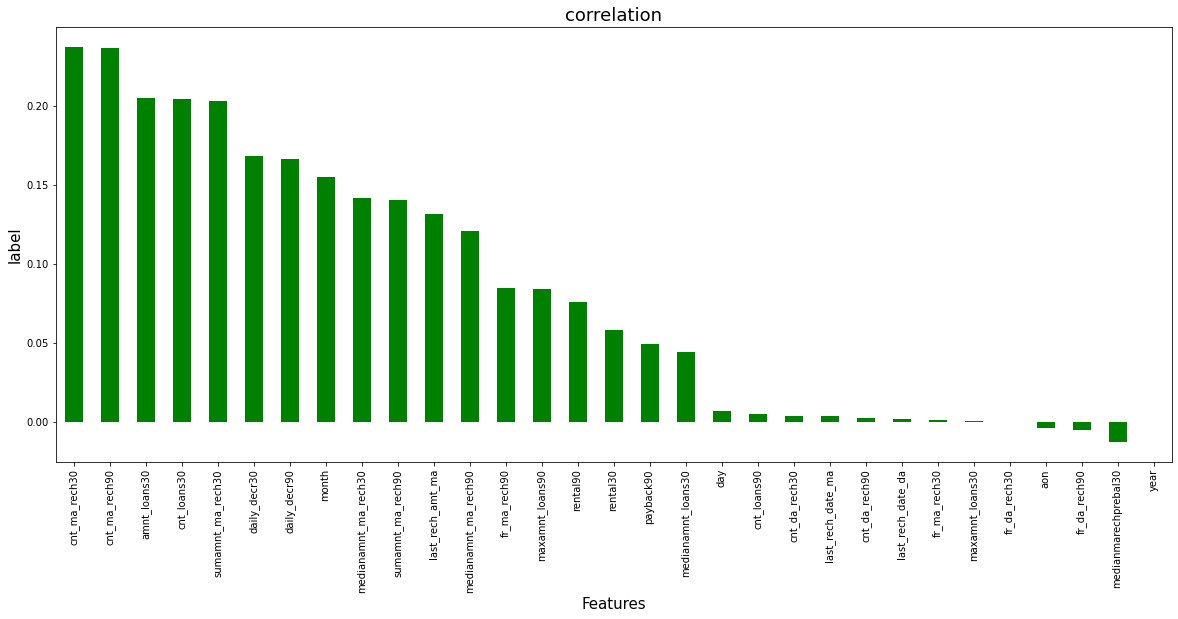

In [63]:
plt.figure(figsize = (20,8))
df.corr()['label'].sort_values(ascending = False).drop(['label']).plot(kind='bar',color = 'g')
plt.xlabel('Features',fontsize=15)
plt.ylabel('label',fontsize=15)
plt.title('correlation',fontsize = 18)
plt.show()

- It is observed that cnt_ma_rech30, cnt_ma_rech90, amnt_loans30 and sumamnt_ma_rech30 have the highest positive correlation with label.
- year, medianmarechprebal30 and fr_do_rech90 have the highest negative correlation with label.

### Checkin data skewness

In [64]:
df.skew().to_frame("Skew Value")

,Skew Value
label,-2.270254
aon,10.392949
daily_decr30,3.946230
daily_decr90,4.252565
rental30,4.521929
rental90,4.437681
last_rech_date_ma,14.790974
last_rech_date_da,14.814857
last_rech_amt_ma,3.781149
cnt_ma_rech30,3.283842


- Outcome of the skewness: Skewness threshold is taken is +/-0.65.
- We can see, all features are having some skewness.

## Checking Outliers

In [65]:
df.shape

(209593, 32)

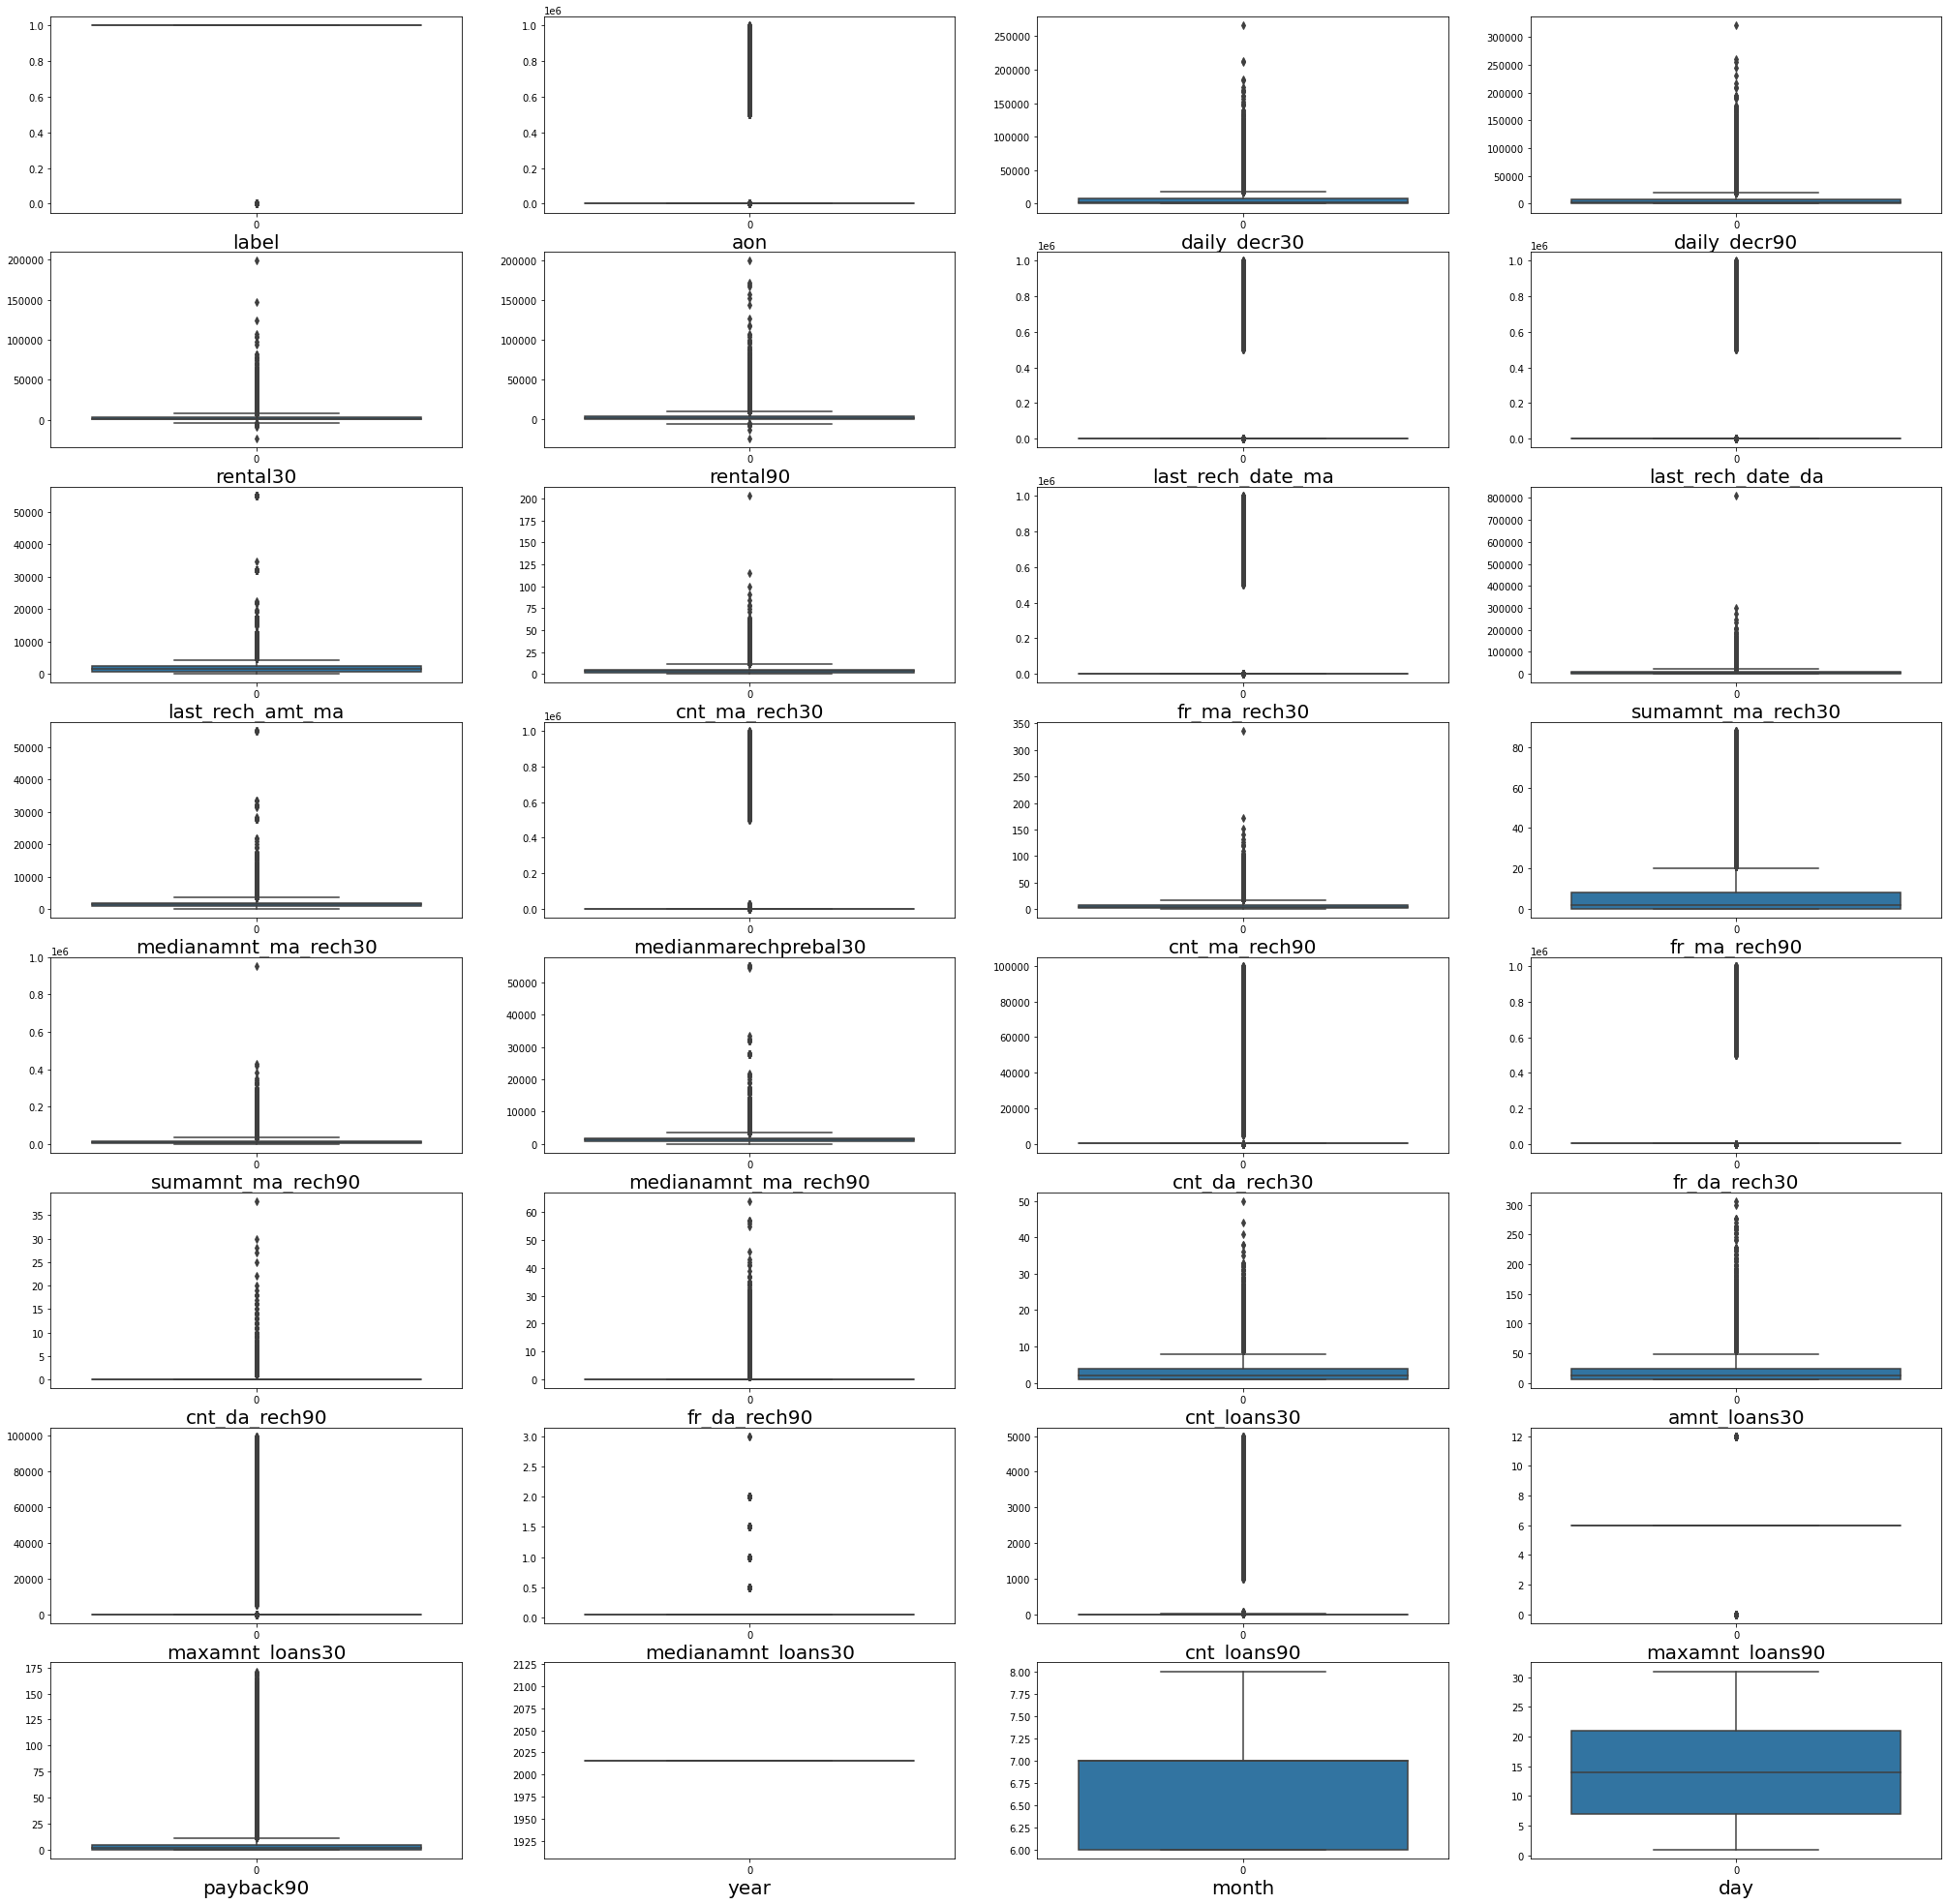

In [66]:
plt.figure(figsize=(35,35))
plotnumber = 1

for column in df:
    if plotnumber <=32:
        plt.subplot(8,4,plotnumber)
        ax = sns.boxplot(data=df[column])
        plt.xlabel(column, fontsize=20)
    plotnumber +=1
plt.show()

- We can see almost all features are having outliers except year, month, day.
- But i am only removing outliers only those features are having continuous data.

### Removing Outliers

In [67]:
from scipy.stats import zscore

z_score = zscore(df[['aon','daily_decr30','daily_decr90','rental30','rental90','sumamnt_ma_rech30','medianmarechprebal30',]])
abs_z_score = np.abs(z_score)    # Apply the formula and get the scaled data

filtering_entry = (abs_z_score  < 3).all(axis=1)

df1 = df[filtering_entry]


In [68]:
df1.shape

(194998, 32)

In [69]:
df.shape

(209593, 32)

### Percentage of dataloss

In [70]:
data_loss = ((209593 - 194998)/209593*100)
print(data_loss,'%')

6.963495918279714 %


#### Data skewness before removing

In [71]:
df.skew()

label                   -2.270254
aon                     10.392949
daily_decr30             3.946230
daily_decr90             4.252565
rental30                 4.521929
rental90                 4.437681
last_rech_date_ma       14.790974
last_rech_date_da       14.814857
last_rech_amt_ma         3.781149
cnt_ma_rech30            3.283842
fr_ma_rech30            14.772833
sumamnt_ma_rech30        6.386787
medianamnt_ma_rech30     3.512324
medianmarechprebal30    14.767538
cnt_ma_rech90            3.425254
fr_ma_rech90             2.285423
sumamnt_ma_rech90        5.185374
medianamnt_ma_rech90     3.752706
cnt_da_rech30           17.839438
fr_da_rech30            14.783041
cnt_da_rech90           27.839219
fr_da_rech90            29.044881
cnt_loans30              2.759445
amnt_loans30             3.021517
maxamnt_loans30         17.658052
medianamnt_loans30       4.693409
cnt_loans90             16.593670
maxamnt_loans90          1.678304
payback90                6.899951
year          

#### Data skewness after removing Outliers

In [72]:
df1.skew()

label                   -2.203701
aon                      0.950105
daily_decr30             1.884406
daily_decr90             1.994418
rental30                 2.082147
rental90                 2.117470
last_rech_date_ma       14.797870
last_rech_date_da       14.834875
last_rech_amt_ma         2.763298
cnt_ma_rech30            2.060105
fr_ma_rech30            14.802773
sumamnt_ma_rech30        1.619279
medianamnt_ma_rech30     2.726404
medianmarechprebal30     1.906986
cnt_ma_rech90            2.223341
fr_ma_rech90             2.232038
sumamnt_ma_rech90        1.983429
medianamnt_ma_rech90     2.993705
cnt_da_rech30           17.762475
fr_da_rech30            14.749249
cnt_da_rech90           24.273225
fr_da_rech90            29.745299
cnt_loans30              2.394221
amnt_loans30             2.373037
maxamnt_loans30         17.669698
medianamnt_loans30       4.668540
cnt_loans90             16.581842
maxamnt_loans90          1.861544
payback90                6.882176
year          

## Checking Multicollinearity

In [73]:
x = df1.drop(columns=['label'],axis=1)
y = df1['label']

In [74]:
from sklearn.preprocessing import StandardScaler

In [75]:
scaler= StandardScaler()
scaled_X = scaler.fit_transform(x)

In [76]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [77]:
vif = pd.DataFrame()

In [78]:
vif["Features"] = x.columns
vif['vif'] = [variance_inflation_factor(scaled_X,i) for i in range(scaled_X.shape[1])]
vif

,Features,vif
0,aon,1.021792
1,daily_decr30,29.846027
2,daily_decr90,33.063554
3,rental30,12.056852
4,rental90,13.270355
5,last_rech_date_ma,1.000104
6,last_rech_date_da,1.000085
7,last_rech_amt_ma,3.755641
8,cnt_ma_rech30,12.815980
9,fr_ma_rech30,1.000099


- If VIF > 10, It means multicollinearity is present.
- MultiCollinearity are exists in amnt_loans30,cnt_loans30, cnt_ma_rech90, daily_decr90,daily_decr30, sumamnt_ma_rech30, nt_ma_rech30,rental90, rental30,daily_decr90 and daily_decr30, Based on ANOVA F scores.

### Droping columns whose having multicollinearity

In [79]:
df1.drop(columns=['amnt_loans30','cnt_loans30','sumamnt_ma_rech30','cnt_ma_rech30','rental90','rental30','daily_decr90','daily_decr90','year'],axis=1,inplace=True)

In [80]:
df1.head()

,label,aon,daily_decr30,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,fr_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,maxamnt_loans30,medianamnt_loans30,cnt_loans90,maxamnt_loans90,payback90,month,day
0,0,272.0,3055.050000,2.0,0.0,1539,21.0,1539.0,7.500000,2,21,3078.0,1539.0,262.57811,3749.494447,0.041495,0.045712,6.0,0.054029,2.0,6,29.000000,7,20
1,1,712.0,12122.000000,20.0,0.0,5787,0.0,5787.0,61.040000,1,0,5787.0,5787.0,262.57811,3749.494447,0.041495,0.045712,12.0,0.054029,1.0,12,0.000000,8,10
2,1,535.0,1398.000000,3.0,0.0,1539,0.0,1539.0,66.320000,1,0,1539.0,1539.0,262.57811,3749.494447,0.041495,0.045712,6.0,0.054029,1.0,6,0.000000,8,19
3,1,241.0,21.228000,41.0,0.0,947,0.0,0.0,3851.927942,1,0,947.0,947.0,262.57811,3749.494447,0.041495,0.045712,6.0,0.054029,2.0,6,0.000000,6,6
4,1,947.0,150.619333,4.0,0.0,2309,2.0,2309.0,29.000000,8,2,23496.0,2888.0,262.57811,3749.494447,0.041495,0.045712,6.0,0.054029,7.0,6,2.333333,6,22


In [81]:
x = df1.drop(columns=['label'],axis=1)
y = df1['label']

## Selecting Kbest Features

In [82]:
from sklearn.feature_selection import SelectKBest, f_classif

In [83]:
bestfeat = SelectKBest(score_func = f_classif, k = 'all')
fit = bestfeat.fit(x,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(x.columns)

In [84]:
fit = bestfeat.fit(x,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(x.columns)
dfcolumns.head()
featureScores = pd.concat([dfcolumns,dfscores],axis = 1)
featureScores.columns = ['Feature', 'Score']
print(featureScores.nlargest(35,'Score'))

                 Feature         Score
7   medianmarechprebal30  20310.017585
8          cnt_ma_rech90  13190.437947
1           daily_decr30   7136.667887
10     sumamnt_ma_rech90   4606.333368
6   medianamnt_ma_rech30   4200.779060
21                 month   4109.161929
4       last_rech_amt_ma   3560.441368
11  medianamnt_ma_rech90   3013.656856
9           fr_ma_rech90   1605.303124
0                    aon   1323.177682
19       maxamnt_loans90   1058.781486
20             payback90    494.479887
17    medianamnt_loans30    419.086098
22                   day     14.696469
15          fr_da_rech90      6.073967
18           cnt_loans90      3.989108
14         cnt_da_rech90      3.225446
2      last_rech_date_ma      2.586836
12         cnt_da_rech30      2.257612
3      last_rech_date_da      0.346444
5           fr_ma_rech30      0.273417
13          fr_da_rech30      0.007951
16       maxamnt_loans30      0.002130


### Selecting best features based on their scores

In [85]:
x_best = x.drop(columns=['fr_da_rech30','fr_da_rech90','cnt_da_rech30']).copy()

### Data Skewness Before removing

In [86]:
df.skew().to_frame("Skew value before removing")

,Skew value before removing
label,-2.270254
aon,10.392949
daily_decr30,3.946230
daily_decr90,4.252565
rental30,4.521929
rental90,4.437681
last_rech_date_ma,14.790974
last_rech_date_da,14.814857
last_rech_amt_ma,3.781149
cnt_ma_rech30,3.283842


### Data After Removing Skewness

In [87]:
from sklearn.preprocessing import power_transform
x = power_transform(x_best,method='yeo-johnson')

In [88]:
trans = pd.DataFrame(x)

In [89]:
trans.skew().to_frame("trans_Skew")

,trans_Skew
0,0.306198
1,-2.136188
2,-5.108870
3,-103.410825
4,-0.090324
5,0.174630
6,-0.223453
7,-0.194728
8,-0.006456
9,0.145041


In [90]:
x = scaler.fit_transform(x)

In [91]:
x

array([[-7.22296123e-01,  4.95037100e-01, -2.36812704e-02, ...,
         1.76724527e+00,  4.74705534e-01,  7.07721937e-01],
       [ 2.53515638e-01,  1.25199246e+00,  1.88914095e-01, ...,
        -9.93808024e-01,  1.52195414e+00, -4.14892215e-01],
       [-1.04965469e-01,  1.46451745e-01,  1.31331149e-03, ...,
        -9.93808024e-01,  1.52195414e+00,  6.06495297e-01],
       ...,
       [ 8.02633368e-01,  1.23748459e+00,  1.31331149e-03, ...,
         7.75230563e-01,  4.74705534e-01,  1.54820791e+00],
       [ 1.93392250e+00,  1.27063915e+00, -2.36812704e-02, ...,
         1.34287169e+00,  4.74705534e-01,  1.18859626e+00],
       [ 1.71149918e+00,  6.86790944e-01,  1.35215164e-01, ...,
        -9.93808024e-01,  4.74705534e-01, -8.23096254e-01]])

## Balancing Dataset

In [92]:
from imblearn.over_sampling import SMOTE as sm

smt_x,smt_y = sm().fit_resample(x,y)

In [93]:
smt_y.value_counts()

0    169697
1    169697
Name: label, dtype: int64

# Building Model

In [94]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

## LogisticRegression

### Finding Best random State

In [95]:
# finding Best Random state
maxAccu=0
maxRS=0

for i in range(1, 1000):
    x_train, x_test, y_train, y_test = train_test_split(smt_x, smt_y, test_size=0.3, random_state=i)
    lr=LogisticRegression()
    lr.fit(x_train, y_train)
    pred = lr.predict(x_test)
    accuracy = accuracy_score(y_test, pred)
    
    if accuracy>maxAccu:
        maxAccu=accuracy
        maxRS=i

print("Best Accuracy score is", maxAccu,"on Random State", maxRS)

Best Accuracy score is 0.7616947720955813 on Random State 928


In [96]:
x_train, x_test, y_train, y_test = train_test_split(smt_x, smt_y, test_size=0.3, random_state=609)

In [97]:
lr = LogisticRegression()
lr.fit(x_train,y_train)

y_pred = lr.predict(x_test)
accuracy_score(y_test,y_pred)

0.7589742582425677

In [98]:
x_train, x_test, y_train, y_test = train_test_split(smt_x, smt_y, test_size=0.3, random_state=609)

In [99]:
lr = LogisticRegression()
lr.fit(x_train,y_train)

y_pred = lr.predict(x_test)
accuracy_score(y_test,y_pred)

0.7589742582425677

### Cross - validation for logistic Regression

In [100]:
from sklearn.model_selection import cross_val_score

In [101]:
pred_lr = lr.predict(x_test)
accu = accuracy_score(y_test,pred_lr)

In [102]:
for j in range(4,10):
    cross = cross_val_score(lr,x,y,cv=j)
    lsc = cross.mean()
    print("At cv:-",j)
    print('Cross validation score is:-',lsc*100)
    print('accuracy_score is:-',accu*100)
    print('\n')

At cv:- 4
Cross validation score is:- 87.39730722155511
accuracy_score is:- 75.89742582425677


At cv:- 5
Cross validation score is:- 87.373717366849
accuracy_score is:- 75.89742582425677


At cv:- 6
Cross validation score is:- 87.3932044930771
accuracy_score is:- 75.89742582425677


At cv:- 7
Cross validation score is:- 87.3932050039615
accuracy_score is:- 75.89742582425677


At cv:- 8
Cross validation score is:- 87.39833313345662
accuracy_score is:- 75.89742582425677


At cv:- 9
Cross validation score is:- 87.40192324255968
accuracy_score is:- 75.89742582425677




In [103]:
lsscore_selected = cross_val_score(lr,x,y,cv=9).mean()
print("The cv score is: ",lsscore_selected,"\nThe accuracy score is: ",accu)

The cv score is:  0.8740192324255968 
The accuracy score is:  0.7589742582425677


In [104]:
def metric_score(clf, x_train_ns,x_test,y_train_ns,y_test, train=True):
    if train:
        
        y_pred = clf.predict(x_train_ns)

        print("\n========================== Train Result=============================")

        print(f"Accuracy Score: {accuracy_score(y_train_ns, y_pred) * 100:.2f}%")

    
    elif train==False:
        pred = clf.predict(x_test)
        
        print("\n==========================Test Result=======================")
        print(f"Accuracy Score: {accuracy_score(y_test,pred) * 100:.2f}%")
        
        print("\n \n Test Classification Report \n", classification_report(y_test, pred, digits=2))
        
        print('\n Confusion Matrix: \n',confusion_matrix(y_test,pred))
    

## Random Forest Classifier
### Finding Best Random State

In [ ]:
# finding Best Random state
maxAccu=0
maxRS=0

for i in range(1, 1000):
    x_train, x_test, y_train, y_test = train_test_split(smt_x, smt_y, test_size=0.3, random_state=i)
    rf=RandomForestClassifier()
    rf.fit(x_train, y_train)
    pred = rf.predict(x_test)
    accuracy = accuracy_score(y_test, pred)
    
    if accuracy>maxAccu:
        maxAccu=accuracy
        maxRS=i

print("Best Accuracy score is", maxAccu,"on Random State", maxRS)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(smt_x, smt_y, test_size=0.3, random_state=779)

In [ ]:
rf = RandomForestClassifier()
rf.fit(x_train,y_train)

metric_score(rf,x_train,x_test,y_train, y_test, train=True)

metric_score(rf,x_train,x_test,y_train, y_test, train=False)


### Cross - Validation for Random Forest classifier

In [ ]:
pred_rf = rf.predict(x_test)
accu = accuracy_score(y_test,pred_rf)

In [ ]:
for j in range(4,10):
    cross = cross_val_score(rf,x,y,cv=j)
    lsc = cross.mean()
    print("At cv:-",j)
    print('Cross validation score is:-',lsc*100)
    print('accuracy_score is:-',accu*100)
    print('\n')

In [ ]:
lsscore_selected = cross_val_score(rf,x,y,cv=9).mean()
print("The cv score is: ",lsscore_selected,"\nThe accuracy score is: ",accu)

## SVC
### Finding Best Random State

In [ ]:
from sklearn.svm import SVC

In [ ]:
# finding Best Random state
maxAccu=0
maxRS=0

for i in range(1, 1000):
    x_train, x_test, y_train, y_test = train_test_split(smt_x, smt_y, test_size=0.3, random_state=i)
    svc=SVC()
    svc.fit(x_train, y_train)
    pred = svc.predict(x_test)
    accuracy = accuracy_score(y_test, pred)
    
    if accuracy>maxAccu:
        maxAccu=accuracy
        maxRS=i

print("Best Accuracy score is", maxAccu,"on Random State", maxRS)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(smt_x, smt_y, test_size=0.3, random_state=15)

In [ ]:
svc = SVC()
svc.fit(x_train,y_train)

metric_score(svc,x_train,x_test,y_train, y_test, train=True)

metric_score(svc,x_train,x_test,y_train, y_test, train=False)

### Cross - Validation for SVC

In [ ]:
pred_svc = svc.predict(x_test)
accu = accuracy_score(y_test,pred_svc)

In [ ]:
for j in range(4,10):
    cross = cross_val_score(svc,x,y,cv=j)
    lsc = cross.mean()
    print("At cv:-",j)
    print('Cross validation score is:-',lsc*100)
    print('accuracy_score is:-',accu*100)
    print('\n')

In [ ]:
lsscore_selected = cross_val_score(svc,x,y,cv=8).mean()
print("The cv score is: ",lsscore_selected,"\nThe accuracy score is: ",accu)

## XGBOOST
### Finding Best Random State

In [ ]:
from xgboost import XGBClassifier

In [ ]:
# finding Best Random state
maxAccu=0
maxRS=0

for i in range(1, 1000):
    x_train, x_test, y_train, y_test = train_test_split(smt_x, smt_y, test_size=0.3, random_state=i)
    xgb=XGBClassifier()
    xgb.fit(x_train, y_train)
    pred = xgb.predict(x_test)
    accuracy = accuracy_score(y_test, pred)
    
    if accuracy>maxAccu:
        maxAccu=accuracy
        maxRS=i

print("Best Accuracy score is", maxAccu,"on Random State", maxRS)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(smt_x, smt_y, test_size=0.3, random_state=97)

In [ ]:
#import xgboost as xgb
xgb = XGBClassifier()

xgb.fit(x_train,y_train)

metric_score(xgb,x_train,x_test,y_train, y_test, train=True)

metric_score(xgb,x_train,x_test,y_train, y_test, train=False)


### Cross - Validation for XGBOOST

In [ ]:
pred_xgb = xgb.predict(x_test)
accu = accuracy_score(y_test,pred_xgb)

In [ ]:
for j in range(4,10):
    cross = cross_val_score(xgb,x,y,cv=j)
    lsc = cross.mean()
    print("At cv:-",j)
    print('Cross validation score is:-',lsc*100)
    print('accuracy_score is:-',accu*100)
    print('\n')

In [ ]:
lsscore_selected = cross_val_score(xgb,x,y,cv=9).mean()
print("The cv score is: ",lsscore_selected,"\nThe accuracy score is: ",accu)

## Selecting Best Model
- Based on comparing Accuracy Score results with Cross Validation results, it is determined XGBoost Classifier is the best model. It has least difference between accuracy score and cross validation.

## Hyperparameter Tuning

In [ ]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

In [ ]:
param = {'learning_rate':[0.05,0.1,0.15,0.20,0.25,0.30],
        'max_depth':[3,4,5,6,8,10,12,15],
        'min_child_weight':[1,3,5,7],
        'gamma':[0.0,0.1,0.2,0.3,0.4],
        'colsample_bytree':[0.3,0.4,0.5,0.7]}

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(smt_x, smt_y, test_size=0.3, random_state=97)

In [ ]:
rd = RandomizedSearchCV(xgb, param_distributions=param)

In [ ]:
rd.fit(x_train,y_train)

print('Best_params  = > ',rd.best_params_)

In [ ]:
rd.best_params_

In [ ]:
xgb = XGBClassifier(min_child_weight=1, max_depth=25, learning_rate=0.2, gamma=0.2, colsample_bytree=0.7)

xgb.fit(x_train,y_train)

metric_score(xgb,x_train,x_test,y_train, y_test, train=True)

metric_score(xgb,x_train,x_test,y_train, y_test, train=False)


## ROC_AUC Curve

In [ ]:
from sklearn.metrics import roc_curve,roc_auc_score
from sklearn.metrics import plot_roc_curve

In [ ]:
# AUC Curve For Training
disp = plot_roc_curve(rf,x_train,y_train)

plot_roc_curve(lr,x_train,y_train, ax=disp.ax_)

plot_roc_curve(svc,x_train,y_train, ax=disp.ax_)

plot_roc_curve(xgb, x_train,y_train, ax=disp.ax_)

plt.legend(prop={'size':10}, loc='lower right')

plt.show()

In [ ]:
# AUC curve for testing

plt.figure(figsize=(20,15))

disp = plot_roc_curve(rf,x_test,y_test)

plot_roc_curve(lr,x_test,y_test, ax=disp.ax_)

plot_roc_curve(svc,x_test,y_test, ax=disp.ax_)

plot_roc_curve(xgb, x_test,y_test, ax=disp.ax_)

plt.legend(prop={'size':11}, loc='lower right')

plt.show()

## Model Save

In [ ]:
import joblib
joblib.dump(xgb,"micro_credit_defaulter_project.pkl")

### Loading the Model

In [ ]:
mod=joblib.load("micro_credit_defaulter_project.pkl")

In [ ]:
print(mod.predict(x))

### Predicting the label

In [ ]:
Prediction_accuracy = pd.DataFrame({'Predictions': mod.predict(x), 'Actual Values': y})
Prediction_accuracy.sample(10)

## Conclusions

- Once a loan is written off, it is no longer on the books of the lender. However, the MFI’s decision to write-off the loan is often driven by prudential accounting or regulatory requirements and is not necessarily a signal that the debt has been forgiven. 
- Therefore, the lender may continue to attempt to recover it, and so the borrower is not free from the prospect of a collections call or visit. 
- The borrower may be barred from future borrowing from the same MFI, or (if reported to a credit bureau) other MFIs. At the microfinance level, bankruptcy is not an option. And, in most developing countries debt counseling or rehabilitation services are not available to assist defaulters.
- In this project report, we have used machine learning algorithms to predict the micro credit defaulters. We have mentioned the step by step procedure to analyse the dataset and finding the correlation between the features. Thus, we can select the features which are correlated to each other and are independent in nature. 

## Limitation of this works and Scope 

- First drawback is the length of the dataset it is very huge and hard to handle.
- Followed by more number of outliers and skewness these two will reduce our model accuracy.
- We have tried best to deal with outliers, skewness and zero values. So, it looks quite good that we have achieved an accuracy of 95.26% even after dealing all these drawbacks.
- This study will not cover all Classification algorithms instead, it is focused on the chosen algorithm, starting from the basic ensemble techniques to the advanced ones.
